# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city + "&units" + units 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | presidencia roque saenz pena
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | daru
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | mbaiki
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | raga
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | upernavik
Pro

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,-65.7125,241.15,62,20,0.00,CA,1676655152
1,kaitangata,-46.2817,169.8464,283.40,94,78,1.65,NZ,1676655153
2,ushuaia,-54.8000,-68.3000,285.96,71,40,6.69,AR,1676655153
3,morant bay,17.8815,-76.4093,302.99,66,4,5.42,JM,1676655154
4,kavaratti,10.5669,72.6420,299.71,69,22,2.40,IN,1676655154


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,241.15,62,20,0.00,CA,1676655152
1,kaitangata,-46.2817,169.8464,283.40,94,78,1.65,NZ,1676655153
2,ushuaia,-54.8000,-68.3000,285.96,71,40,6.69,AR,1676655153
3,morant bay,17.8815,-76.4093,302.99,66,4,5.42,JM,1676655154
4,kavaratti,10.5669,72.6420,299.71,69,22,2.40,IN,1676655154


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

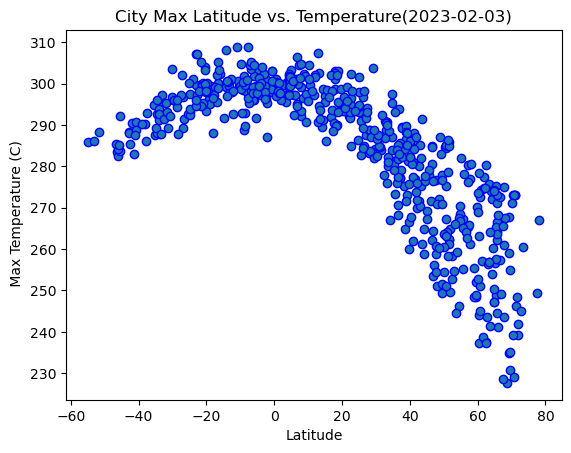

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker ="o",edgecolors="b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel(" Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

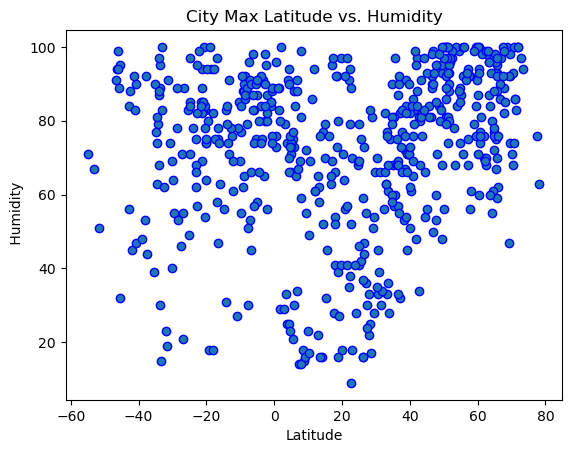

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker ="o",edgecolors="b")
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel(" Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

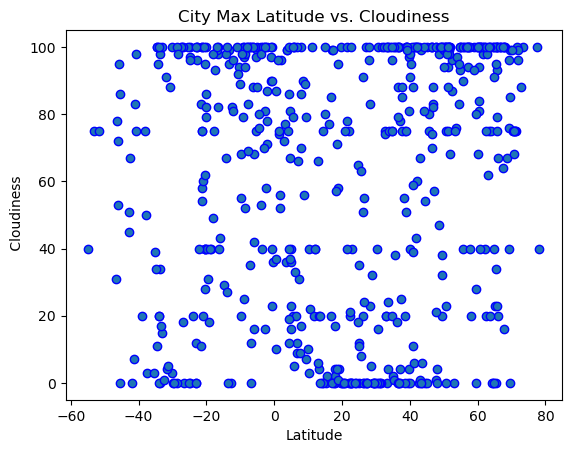

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker ="o",edgecolors="b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel(" Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

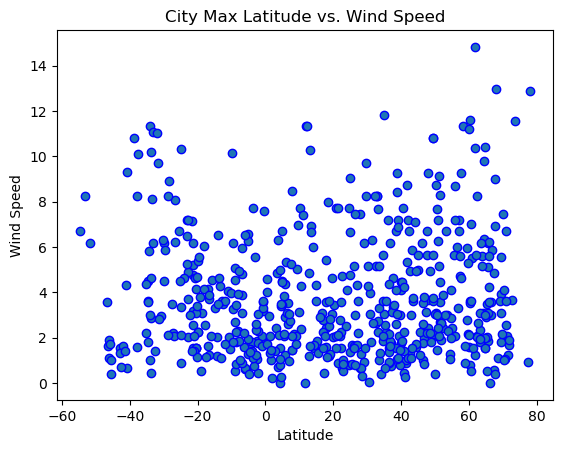

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker ="o",edgecolors="b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pangnirtung,66.1451,-65.7125,241.15,62,20,0.00,CA,1676655152
3,morant bay,17.8815,-76.4093,302.99,66,4,5.42,JM,1676655154
4,kavaratti,10.5669,72.6420,299.71,69,22,2.40,IN,1676655154
5,barrow,71.2906,-156.7887,246.16,83,75,2.06,US,1676655155
10,mbaiki,3.8678,17.9892,299.71,25,99,0.72,CF,1676655157


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lng"] >= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaitangata,-46.2817,169.8464,283.40,94,78,1.65,NZ,1676655153
4,kavaratti,10.5669,72.6420,299.71,69,22,2.40,IN,1676655154
8,daru,-9.0763,143.2092,298.44,88,100,2.67,PG,1676655157
9,port alfred,-33.5906,26.8910,292.69,95,98,0.45,ZA,1676655157
10,mbaiki,3.8678,17.9892,299.71,25,99,0.72,CF,1676655157


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is :0.7099127083596248


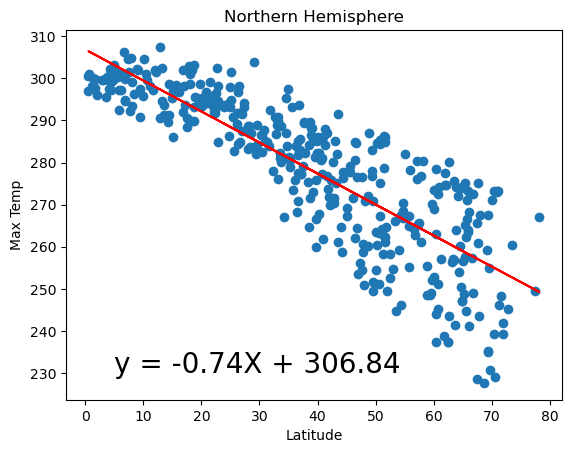

In [43]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,230), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

The r-squared is :0.5752209664451543


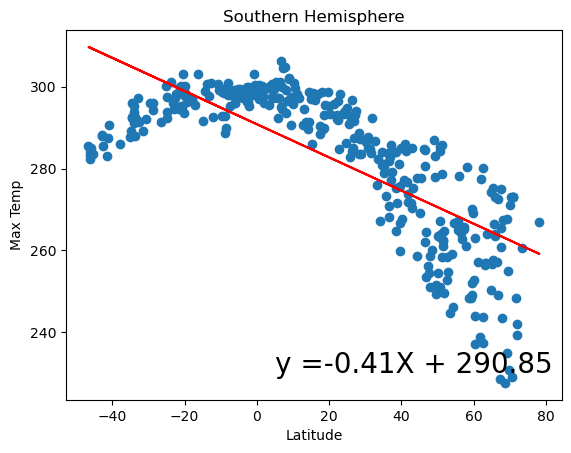

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,230), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is :0.20995432292369143


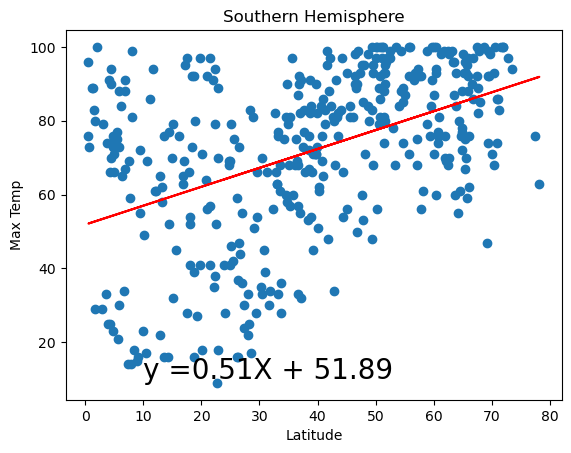

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

The r-squared is :0.01745499963815418


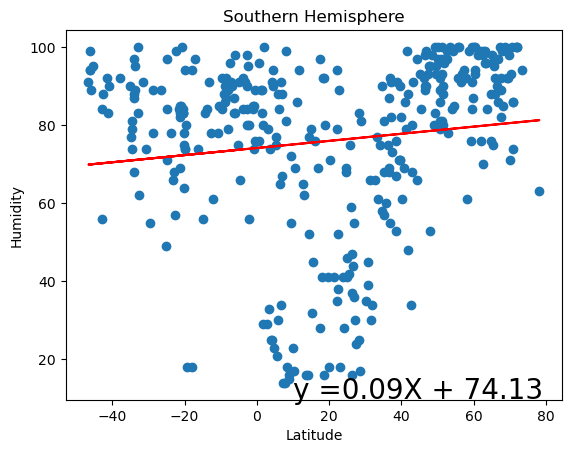

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is :0.10536185872143834


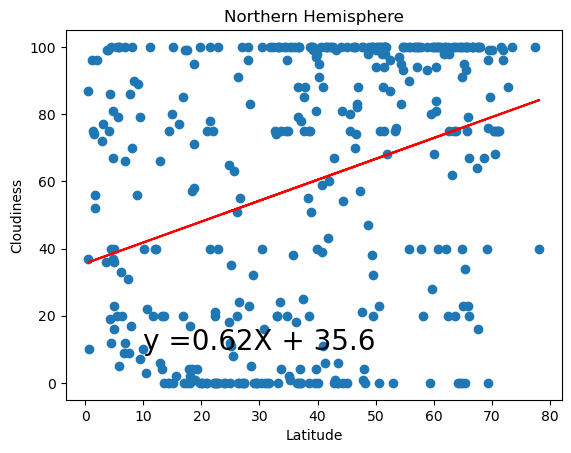

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

The r-squared is :0.018226803278625477


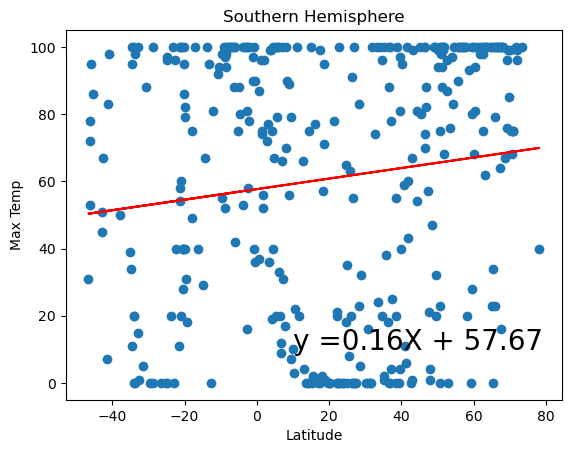

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is :0.023042347117568973


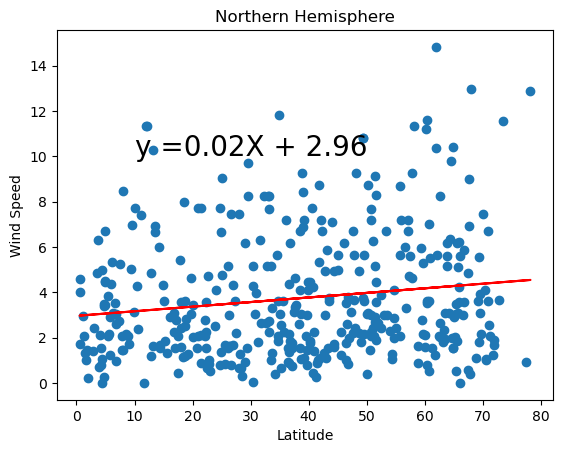

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

The r-squared is :0.012502254067361015


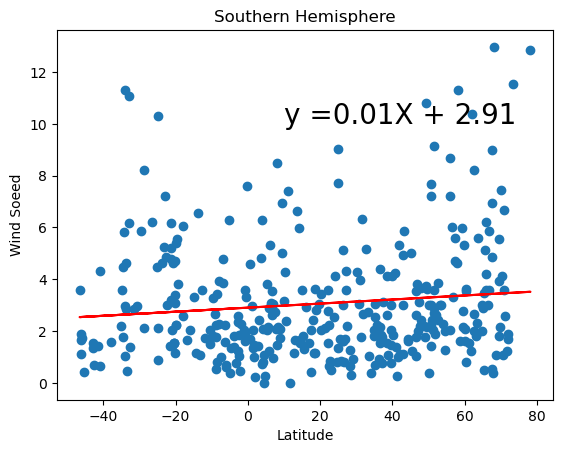

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y =" + str(round(slope,2)) + "X + " + str(round(intercept,2)) 
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10), fontsize=20, color="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Soeed")
plt.title("Southern Hemisphere")
print(f'The r-squared is :{rvalue**2}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE